# Project P3: Cooperation and Competition

This notebook demonstrates how two agents can be trained through self-play to solve a task

All parameters are defined in the `Config` class of the `utils` module and preset to default values at instantiation. This includes all paths, hyperparameters and even the enviornment.

The `training` module defines the `ddpg` method implementing the DDPG algorithm used in this project to train the agent whi is defined in module `ddpg_agent` through self-play.

In [1]:
from training import maddpg
from utils import Config, MyEncoder

from maddpg_agent import Agent

In [2]:
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

import json
import numpy as np
import pandas as pd

from operator import add, sub

In [3]:
config = Config()
config.fc1_units = 128
config.fc2_units = 64
config.gamma = 0.96
config.max_t = int(2e3)

config.n_learn_steps = 10
config.n_learn_updates = 5

print(config.to_dict())

Path results already exists


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


{'n_agents': 2, 'target_episode': None, 'target_score': None, 'device': device(type='cpu'), 'model_id_auto': True, 'model_id': 68, 'env_path': PosixPath('Tennis.x86_64'), 'brain_name': 'TennisBrain', 'state_dim': 24, 'action_dim': 2, 'n_episodes': 5000, 'max_t': 2000, 'buffer_size': 1000000, 'batch_size': 128, 'gamma': 0.96, 'tau': 0.06, 'lr_actor': 0.001, 'lr_critic': 0.001, 'critic_weight_decay': 0, 'fc1_units': 128, 'fc2_units': 64, 'seed': 48, 'n_print': 100, 'target': 0.5, 'window': 100, 'n_learn_steps': 10, 'n_learn_updates': 5, 'all_episodes': True}


Episode  100	Current Score  0.00	Avg Score  0.01	Std Score  0.03
Episode  200	Current Score  0.10	Avg Score  0.03	Std Score  0.06
Episode  300	Current Score  0.00	Avg Score  0.05	Std Score  0.07
Episode  400	Current Score  0.50	Avg Score  0.10	Std Score  0.10
Episode  500	Current Score  1.20	Avg Score  0.24	Std Score  0.29
Episode  600	Current Score  2.00	Avg Score  0.30	Std Score  0.33
Episode  700	Current Score  0.30	Avg Score  0.44	Std Score  0.51
Episode  800	Current Score  0.10	Avg Score  0.42	Std Score  0.45
Episode  900	Current Score  0.10	Avg Score  0.48	Std Score  0.47
Episode  907	Current Score  1.00	Avg Score  0.51	Std Score  0.48
Environment solved in 807 episodes	Average Score : 0.51
Episode 1000	Current Score  0.30	Avg Score  0.52	Std Score  0.46
Episode 1100	Current Score  0.10	Avg Score  0.68	Std Score  0.68
Episode 1200	Current Score  1.70	Avg Score  0.61	Std Score  0.58
Episode 1300	Current Score  1.30	Avg Score  0.59	Std Score  0.60
Episode 1400	Current Score  0.80	A

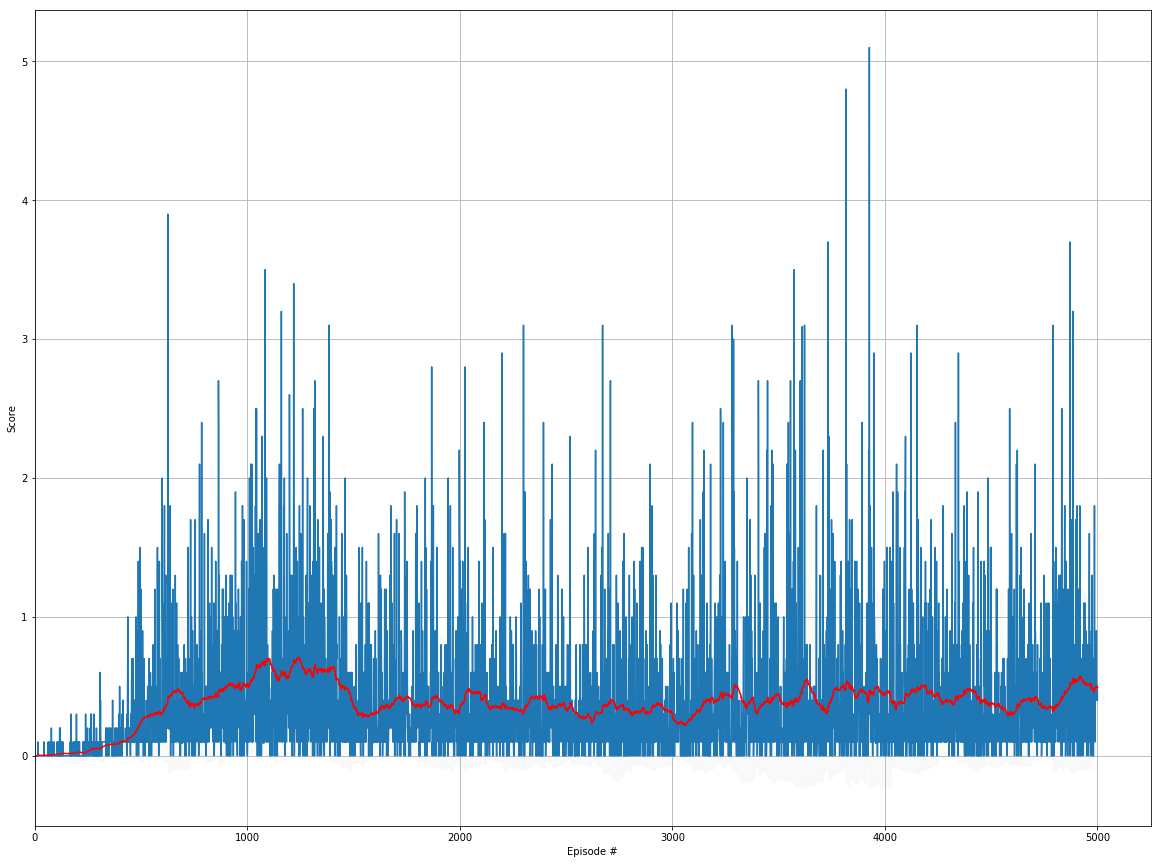

In [4]:
scores, ma_scores, std_scores = maddpg(config)

with open(f'results/model {config.model_id}/config.json', 'w') as f:
    json.dump(config.to_dict(), f, cls=MyEncoder)

fig = plt.figure(figsize=(20, 15))

x = np.arange(1, len(scores) + 1)

plt.plot(x, scores)
plt.plot(x, ma_scores, color='r')
plt.ylabel('Score')
bottom, top = plt.ylim()
# plt.ylim(bottom, 40)

plt.xlabel('Episode #')
left, right = plt.xlim()
plt.xlim(0, right)

plt.grid(True)

font = {'size': 24}
plt.rc('font', **font)

plt.fill_between(x, list(map(sub, ma_scores, std_scores)), list(map(add, ma_scores, std_scores)), 
color='whitesmoke', alpha=.5)

plt.savefig(f'results/model {config.model_id}/scores.png')
plt.show()

df = pd.DataFrame({'episode': np.arange(len(scores)), 'score': scores, 'ma': ma_scores, 'std': std_scores})
df.set_index('episode', inplace=True)
df.to_csv(f'results/model {config.model_id}/scores.csv')

config.env.close()